Datasets to cover
- UTD-MHAD
- USCHAD
- WHARF
- PAMAP2P

In [1]:
import tensorflow as tf
import numpy as np

2024-10-18 08:11:45.703116: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-18 08:11:45.816329: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 08:11:45.816363: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 08:11:45.836542: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-18 08:11:45.876735: I tensorflow/core/platform/cpu_feature_guar

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

y_train = tf.one_hot(y_train[:,0], 10)
y_test = tf.one_hot(y_test[:,0], 10)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train_mean = np.mean(X_train, axis=0)
X_train -= X_train_mean
X_test -= X_train_mean

2024-10-18 08:11:48.411416: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-18 08:11:48.478527: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-18 08:11:48.484675: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

# Build model

In [3]:
from template_architectures import Transformer

input_shape = X_train.shape[1:]
n_classes = y_train.shape[1]
projection_dim = 64
num_heads = []
for i in range(10):
    num_heads.append(4)

model = Transformer(input_shape, projection_dim, num_heads, n_classes)

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, batch_size=256, verbose=1, epochs=200)


Epoch 1/200


2024-10-18 08:11:57.954986: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-18 08:11:58.219034: I external/local_xla/xla/service/service.cc:168] XLA service 0x5897e299d5f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-18 08:11:58.219051: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Ti, Compute Capability 8.9
2024-10-18 08:11:58.224226: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-18 08:11:58.240940: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1729249918.276913    6351 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


196/196 [==============================] - 15s 24ms/step - loss: 1.7849 - accuracy: 0.3815
Epoch 2/200
196/196 [==============================] - 5s 24ms/step - loss: 1.3624 - accuracy: 0.5118
Epoch 3/200
196/196 [==============================] - 5s 24ms/step - loss: 1.1887 - accuracy: 0.5784
Epoch 4/200
196/196 [==============================] - 5s 24ms/step - loss: 1.0654 - accuracy: 0.6221
Epoch 5/200
196/196 [==============================] - 5s 23ms/step - loss: 0.9567 - accuracy: 0.6615
Epoch 6/200
196/196 [==============================] - 5s 23ms/step - loss: 0.8531 - accuracy: 0.6980
Epoch 7/200
196/196 [==============================] - 5s 23ms/step - loss: 0.7630 - accuracy: 0.7303
Epoch 8/200
196/196 [==============================] - 5s 23ms/step - loss: 0.6698 - accuracy: 0.7614
Epoch 9/200
196/196 [==============================] - 5s 24ms/step - loss: 0.5752 - accuracy: 0.7986
Epoch 10/200
196/196 [==============================] - 5s 24ms/step - loss: 0.4890 - accurac

In [10]:
# np.save('TransformersCifar10/train_hist.npy', hist.history)

In [12]:
tf.keras.models.save_model(model, 'TransformersCifar10/model_pretrained.keras')

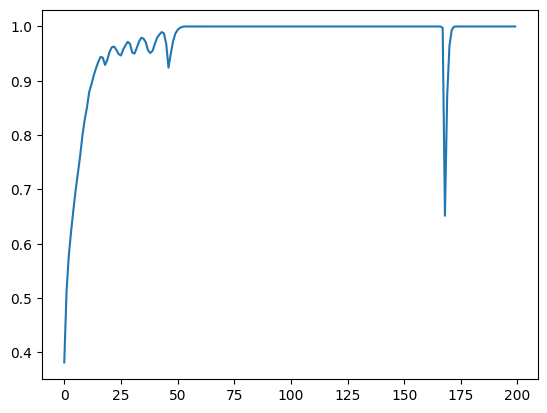

In [11]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])

In [13]:
np.argmax(model.predict(X_test, verbose=0), axis=1)

array([3, 8, 0, ..., 5, 4, 7])

In [16]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(np.argmax(model.predict(X_test, verbose=0), axis=1), np.argmax(y_test, axis=1))
print(acc)

0.6068
